29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch [1/20]
  Training Loss: 0.5713, Accuracy: 0.8007, F1 Score: 0.7978
  Validation Loss: 0.4369, Accuracy: 0.8444, F1 Score: 0.8437
Epoch [2/20]
  Training Loss: 0.3924, Accuracy: 0.8585, F1 Score: 0.8577
  Validation Loss: 0.4024, Accuracy: 0.8555, F1 Score: 0.8554
Epoch [3/20]
  Training Loss: 0.3488, Accuracy: 0.8736, F1 Score: 0.8731
  Validation Loss: 0.4159, Accuracy: 0.8496, F1 Score: 0.8501
Epoch [4/20]
  Training Loss: 0.3248, Accuracy: 0.8806, F1 Score: 0.8801
  Validation Loss: 0.3657, Accuracy: 0.8691, F1 Score: 0.8672
Epoch [5/20]
  Training Loss: 0.3067, Accuracy: 0.8873, F1 Score: 0.8869
  Validation Loss: 0.3609, Accuracy: 0.8710, F1 Score: 0.8693
Epoch [6/20]
  Training Loss: 0.2933, Accuracy: 0.8913, F1 Score: 0.8910
  Validation Loss: 0.3497, Accuracy: 0.8716, F1 Score: 0.8698
Ep

C:\Users\amanb\AppData\Local\Temp\ipykernel_70728\3988181765.py:69: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ..\torch\csrc\utils\python_arg_parser.cpp:1519.)
  m.mul_(beta1).add_(1 - beta1, grad)


Epoch [1/20]
  Training Loss: 0.4882, Accuracy: 0.8207, F1 Score: 0.8190
  Validation Loss: 0.4042, Accuracy: 0.8553, F1 Score: 0.8550
Epoch [2/20]
  Training Loss: 0.3607, Accuracy: 0.8659, F1 Score: 0.8654
  Validation Loss: 0.4158, Accuracy: 0.8461, F1 Score: 0.8496
Epoch [3/20]
  Training Loss: 0.3304, Accuracy: 0.8794, F1 Score: 0.8791
  Validation Loss: 0.3744, Accuracy: 0.8603, F1 Score: 0.8571
Epoch [4/20]
  Training Loss: 0.3087, Accuracy: 0.8857, F1 Score: 0.8854
  Validation Loss: 0.3454, Accuracy: 0.8743, F1 Score: 0.8743
Epoch [5/20]
  Training Loss: 0.2916, Accuracy: 0.8917, F1 Score: 0.8913
  Validation Loss: 0.3381, Accuracy: 0.8787, F1 Score: 0.8772
Epoch [6/20]
  Training Loss: 0.2780, Accuracy: 0.8968, F1 Score: 0.8964
  Validation Loss: 0.3484, Accuracy: 0.8771, F1 Score: 0.8763
Epoch [7/20]
  Training Loss: 0.2684, Accuracy: 0.8997, F1 Score: 0.8994
  Validation Loss: 0.3362, Accuracy: 0.8781, F1 Score: 0.8778
Epoch [8/20]
  Training Loss: 0.2569, Accuracy: 0.9032,

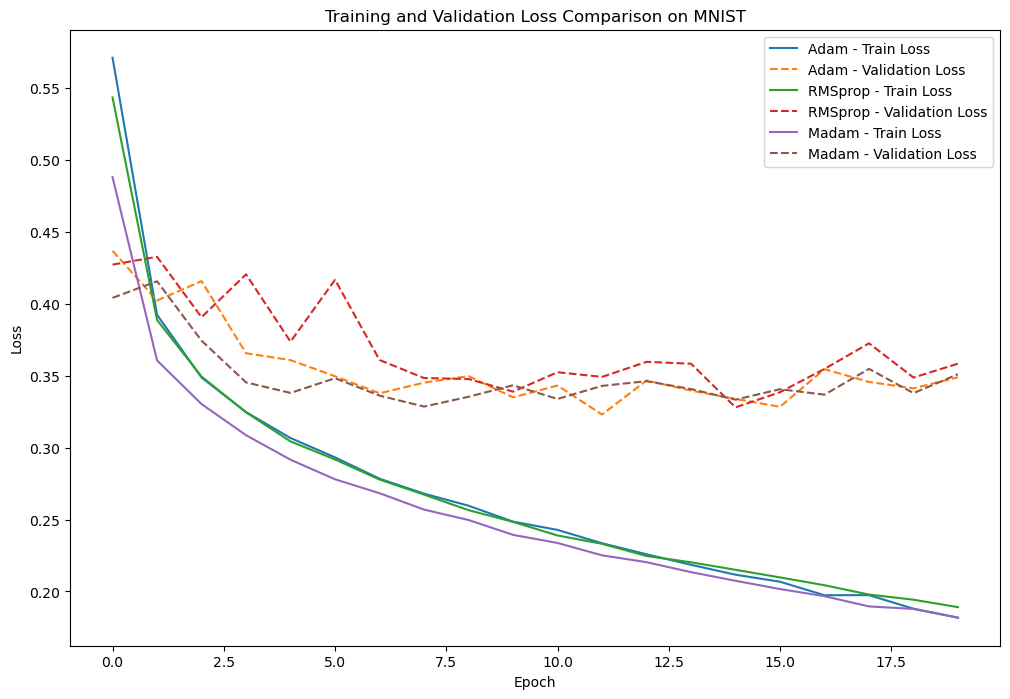

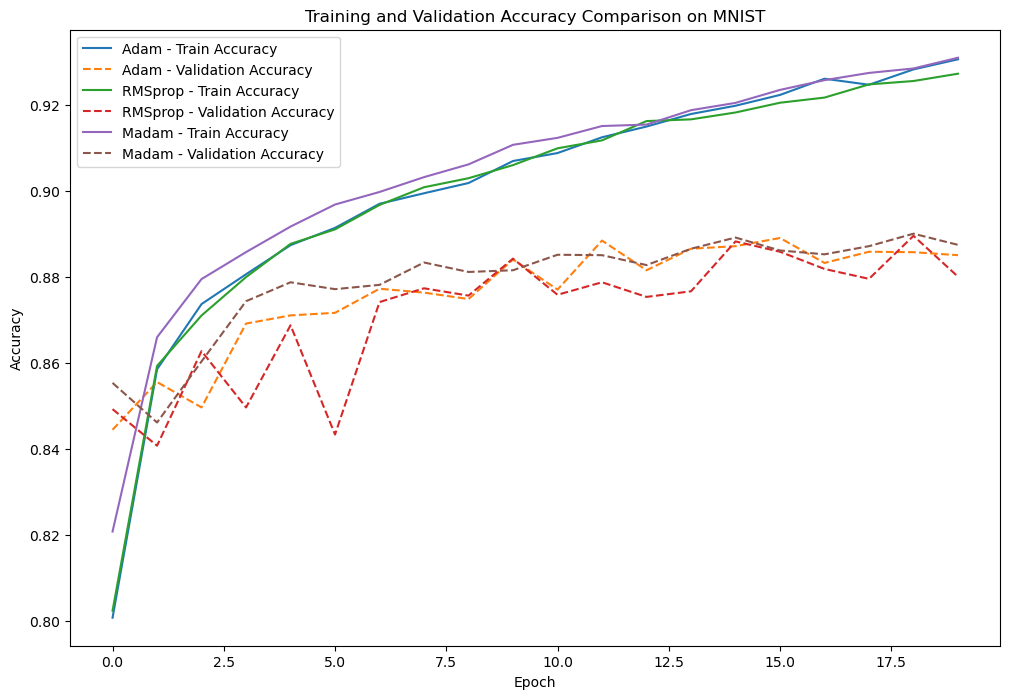

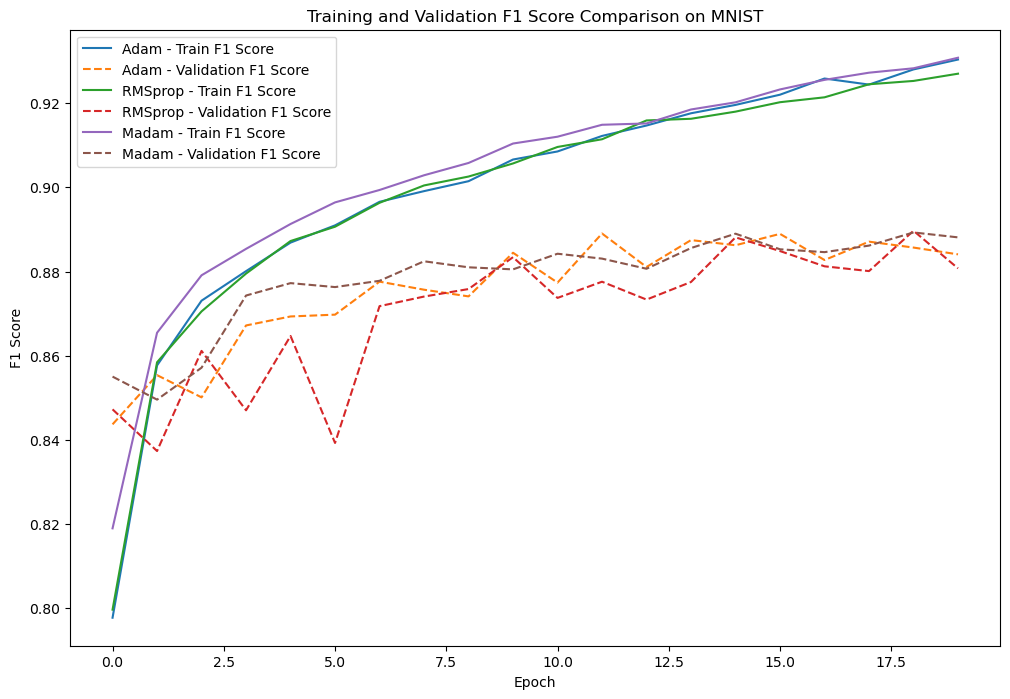

Adam - Min Training Loss: 0.1818, Min Validation Loss: 0.3231
Adam - Max Training Accuracy: 0.9305, Max Validation Accuracy: 0.8890
Adam - Max Training F1 Score: 0.9304, Max Validation F1 Score: 0.8890
RMSprop - Min Training Loss: 0.1891, Min Validation Loss: 0.3281
RMSprop - Max Training Accuracy: 0.9272, Max Validation Accuracy: 0.8895
RMSprop - Max Training F1 Score: 0.9270, Max Validation F1 Score: 0.8897
Madam - Min Training Loss: 0.1817, Min Validation Loss: 0.3286
Madam - Max Training Accuracy: 0.9309, Max Validation Accuracy: 0.8900
Madam - Max Training F1 Score: 0.9308, Max Validation F1 Score: 0.8893


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score


(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0 
x_train = torch.tensor(x_train.reshape(-1, 28*28), dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_val = torch.tensor(x_val.reshape(-1, 28*28), dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

class SimpleNet(nn.Module):
    def __init__(self, num_features):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(num_features, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class Madam(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        defaults = dict(lr=lr, beta1=beta1, beta2=beta2, eps=eps)
        super(Madam, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]

                if len(state) == 0:
                    state['m'] = torch.zeros_like(p.data)
                    state['k'] = torch.zeros_like(p.data)
                    state['v'] = torch.zeros_like(p.data)

                m, k, v = state['m'], state['k'], state['v']
                beta1, beta2, eps, lr = group['beta1'], group['beta2'], group['eps'], group['lr']

                m.mul_(beta1).add_(1 - beta1, grad)
                k.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                v.mul_(beta1).addcdiv_(1 - beta1, grad / (torch.sqrt(k) + eps), v)

                look_ahead = p.data - lr * m / (torch.sqrt(k) + eps)
                p.data.add_(look_ahead - p.data)

        return loss

class adam_2(torch.optim.Optimizer):
    def __init__(self, params, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        defaults = dict(lr=lr, beta1=beta1, beta2=beta2, eps=eps)
        super(adam_2, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                state = self.state[p]

                if len(state) == 0:
                    state['v'] = torch.zeros_like(p.data)
                    state['k'] = torch.zeros_like(p.data)

                v, k = state['v'], state['k']
                beta1, beta2, eps, lr = group['beta1'], group['beta2'], group['eps'], group['lr']

                v.mul_(beta1).add_(grad, alpha=1 - beta1)
                k.mul_(beta2).addcmul_(grad, grad, value=1 - beta2)

                lookahead_grad = grad - beta1 * v
                p.data.addcdiv_(lookahead_grad, torch.sqrt(k) + eps, value=-lr)

        return loss
    

def train_model_with_metrics(model, optimizer, train_loader, val_loader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    train_f1_scores, val_f1_scores = [], []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        all_train_targets, all_train_preds = [], []
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            all_train_preds.extend(preds.cpu().numpy())
            all_train_targets.extend(targets.cpu().numpy())
        
        train_loss = running_train_loss / len(train_loader)
        train_accuracy = accuracy_score(all_train_targets, all_train_preds)
        train_f1 = f1_score(all_train_targets, all_train_preds, average='macro')
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        train_f1_scores.append(train_f1)

        model.eval()
        running_val_loss = 0.0
        all_val_targets, all_val_preds = [], []
        
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                running_val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                all_val_preds.extend(preds.cpu().numpy())
                all_val_targets.extend(targets.cpu().numpy())
        
        val_loss = running_val_loss / len(val_loader)
        val_accuracy = accuracy_score(all_val_targets, all_val_preds)
        val_f1 = f1_score(all_val_targets, all_val_preds, average='macro')
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        val_f1_scores.append(val_f1)

        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"  Training Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}")
        print(f"  Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies, train_f1_scores, val_f1_scores


def create_optimizer(opt_name, model):
    if opt_name == "adam_2":
        return adam_2(model.parameters(), lr=0.001)
    elif opt_name == "SGD":
        return optim.SGD(model.parameters(), lr=0.001)
    elif opt_name == "Adam":
        return optim.Adam(model.parameters(), lr=0.001)
    elif opt_name == "RMSprop":
        return optim.RMSprop(model.parameters(), lr=0.001)
    elif opt_name == "Nadam":
        return optim.NAdam(model.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=0.01)
    elif opt_name == "Madam":
        return Madam(model.parameters(), lr=0.001)
    
optimizers = [ "Adam", "RMSprop","Madam"]
num_epochs = 20
results = {}

for opt_name in optimizers:
    model = SimpleNet(num_features=28*28) 
    optimizer = create_optimizer(opt_name, model)
    train_losses, val_losses, train_accuracies, val_accuracies, train_f1_scores, val_f1_scores = train_model_with_metrics(
        model, optimizer, train_loader, val_loader, num_epochs=num_epochs)
    results[opt_name] = {
        'train_loss': train_losses, 
        'val_loss': val_losses,
        'train_accuracy': train_accuracies,
        'val_accuracy': val_accuracies,
        'train_f1': train_f1_scores,
        'val_f1': val_f1_scores
    }
    print(f"{opt_name} training completed.")

plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_loss'], label=f"{opt_name} - Train Loss")
    plt.plot(metrics['val_loss'], label=f"{opt_name} - Validation Loss", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Comparison on MNIST")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_accuracy'], label=f"{opt_name} - Train Accuracy")
    plt.plot(metrics['val_accuracy'], label=f"{opt_name} - Validation Accuracy", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Comparison on MNIST")
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_f1'], label=f"{opt_name} - Train F1 Score")
    plt.plot(metrics['val_f1'], label=f"{opt_name} - Validation F1 Score", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("Training and Validation F1 Score Comparison on MNIST")
plt.legend()
plt.show()


for opt_name, metrics in results.items():
    min_train_loss = min(metrics['train_loss'])
    min_val_loss = min(metrics['val_loss'])
    max_train_accuracy = max(metrics['train_accuracy'])
    max_val_accuracy = max(metrics['val_accuracy'])
    max_train_f1 = max(metrics['train_f1'])
    max_val_f1 = max(metrics['val_f1'])
    print(f"{opt_name} - Min Training Loss: {min_train_loss:.4f}, Min Validation Loss: {min_val_loss:.4f}")
    print(f"{opt_name} - Max Training Accuracy: {max_train_accuracy:.4f}, Max Validation Accuracy: {max_val_accuracy:.4f}")
    print(f"{opt_name} - Max Training F1 Score: {max_train_f1:.4f}, Max Validation F1 Score: {max_val_f1:.4f}")


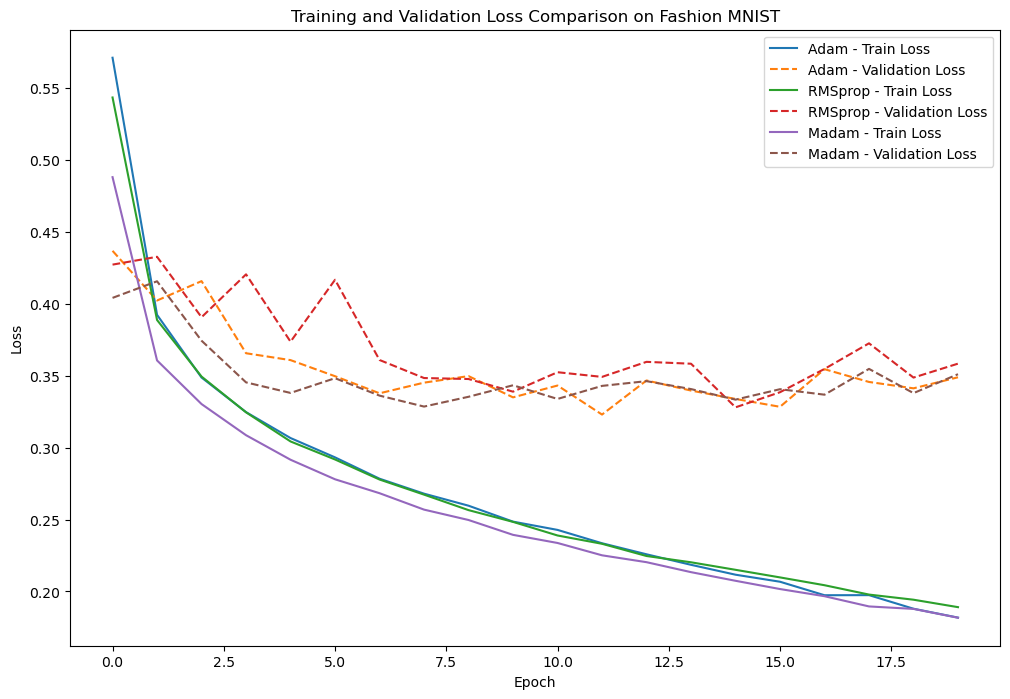

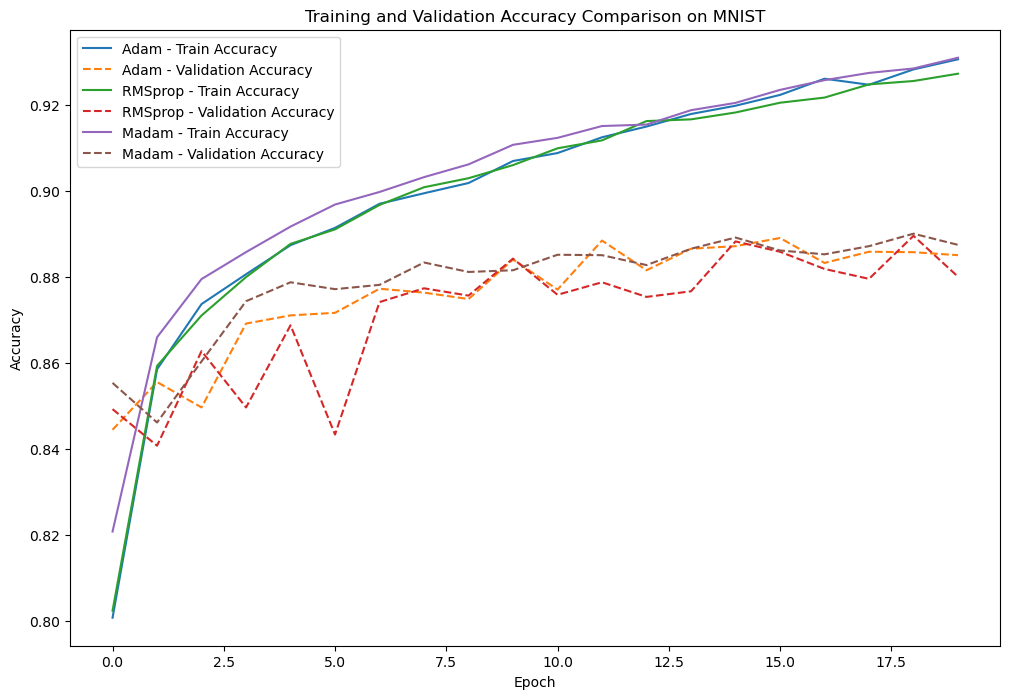

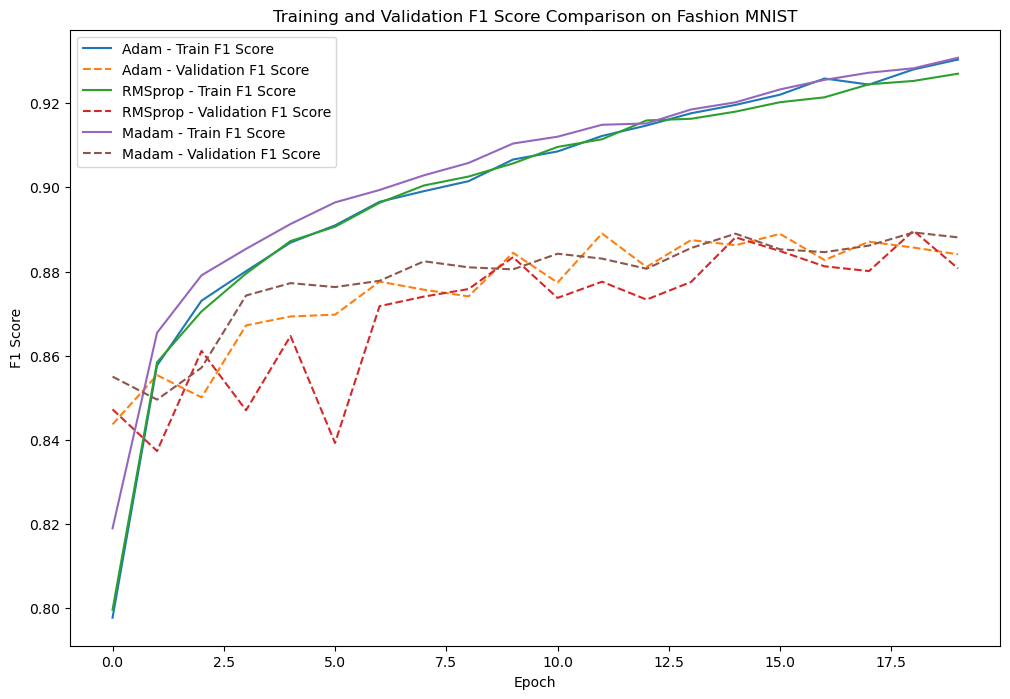

In [3]:
# Plotting losses
plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_loss'], label=f"{opt_name} - Train Loss")
    plt.plot(metrics['val_loss'], label=f"{opt_name} - Validation Loss", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Comparison on Fashion MNIST")
plt.legend()
plt.show()

# Plotting accuracy
plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_accuracy'], label=f"{opt_name} - Train Accuracy")
    plt.plot(metrics['val_accuracy'], label=f"{opt_name} - Validation Accuracy", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Comparison on MNIST")
plt.legend()
plt.show()

# Plotting F1 score
plt.figure(figsize=(12, 8))
for opt_name, metrics in results.items():
    plt.plot(metrics['train_f1'], label=f"{opt_name} - Train F1 Score")
    plt.plot(metrics['val_f1'], label=f"{opt_name} - Validation F1 Score", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("Training and Validation F1 Score Comparison on Fashion MNIST")
plt.legend()
plt.show()
